
### Problem Statement:
The dataset is in zipped format. We have to extract the dataset in the program,
visualize the number of male and female babies born in a particular year, and
find out popular baby names.

### Hints:
● First, use pandas, zipfile and BytesIO library to extract the data. Find out a
way to extract only files that consist of useful data

● Hint: pd.read_csv(BytesIO(z.read(file_name)), encoding='utf-8',
engine='python', header=None)

● Then, visualize the number of male and female babies born in a particular
year with the help of pandas. DataFrame.plot, then analyze baby names
by sorting out all birth counts

● Then, analyze baby names by sorting out top 100 birth counts and group
them by names to find out popular baby names

In [22]:
import pandas as pd
import zipfile

# Path to the locally saved zipfile
zip_file_path = 'names for analysing naming trends project 2.zip'

# Extracting only the files with 'yob' in their names (assuming they contain useful data)
useful_files = []
with zipfile.ZipFile(zip_file_path) as z:
    useful_files = [name for name in z.namelist() if 'yob' in name.lower()]

    # Load each useful file into a Pandas DataFrame
    dfs = []
    for file_name in useful_files:
        with z.open(file_name) as f:
            df = pd.read_csv(f, header=None, names=['Name', 'Gender', 'Count'])
            # Extract year from the file name (assuming format is 'yobYYYY.txt')
            year = int(file_name[3:7])
            df['Year'] = year
            dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
baby_names_df = pd.concat(dfs, ignore_index=True)



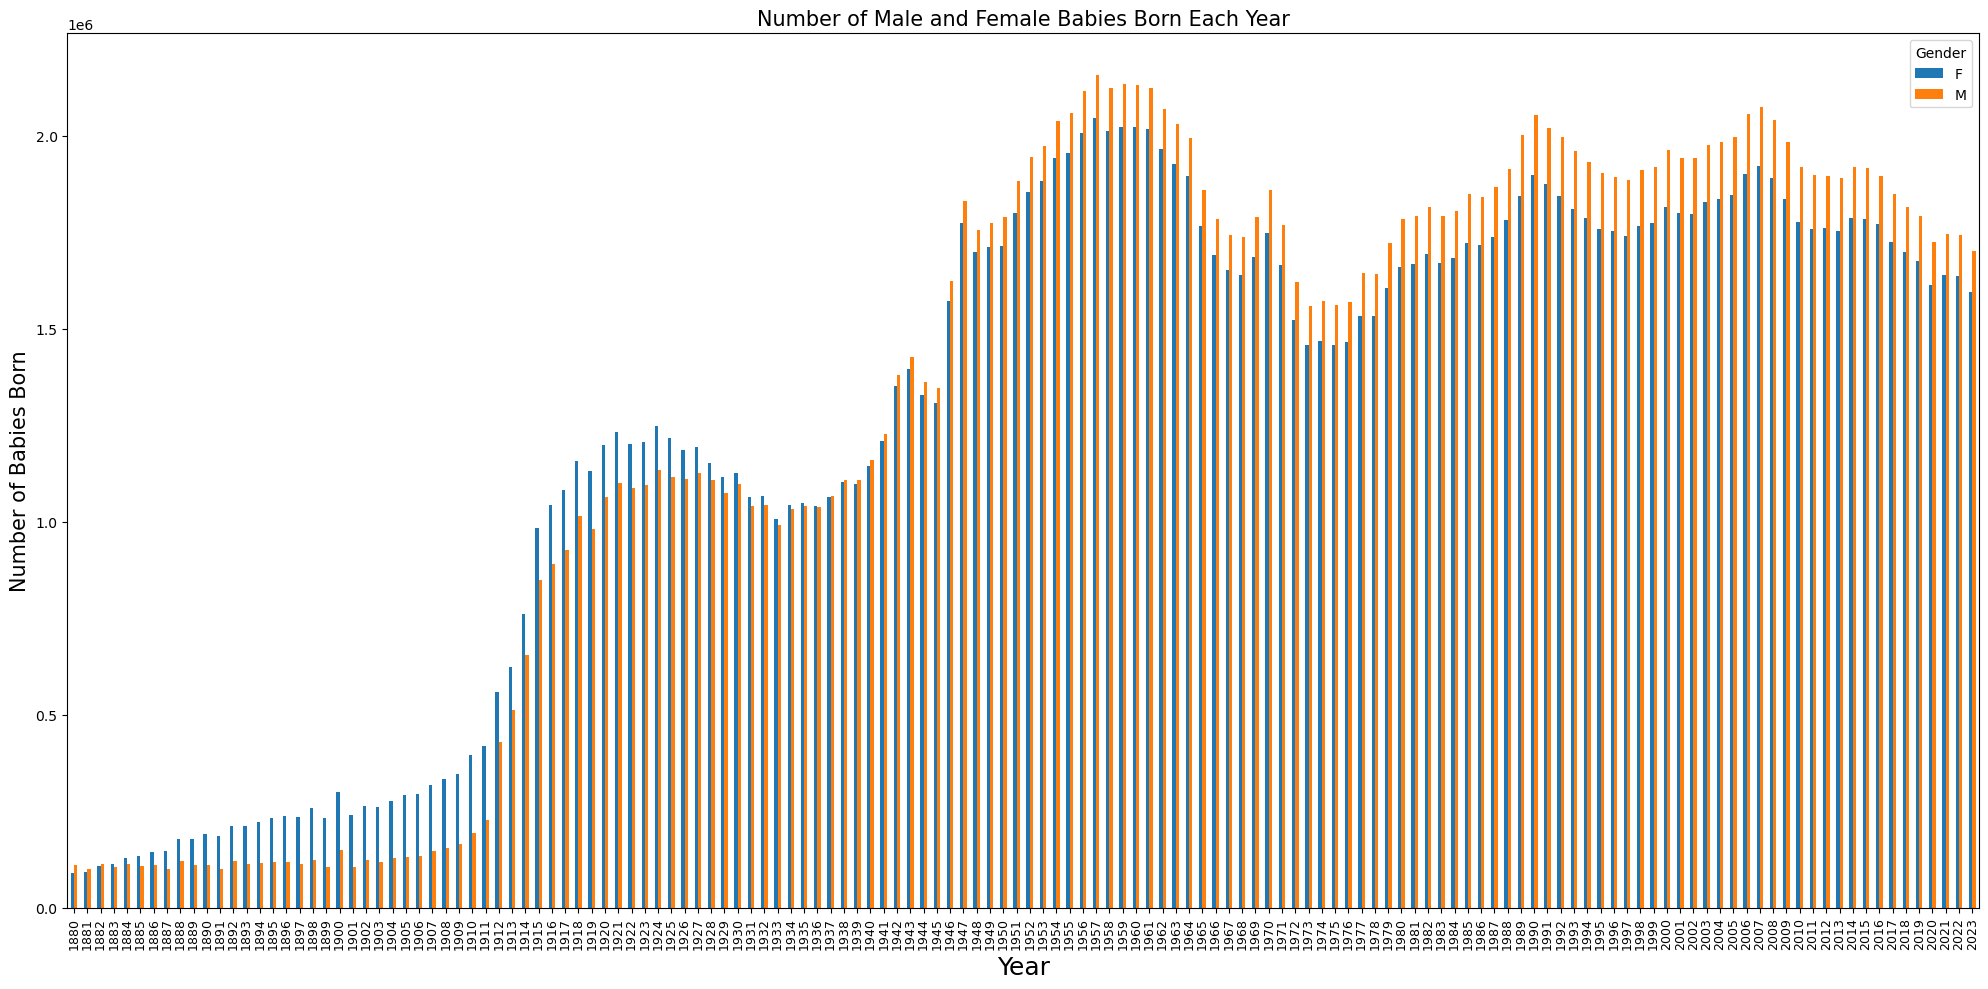

In [23]:
import matplotlib.pyplot as plt

# Group by Year and Gender to get total births
births_by_year_gender = baby_names_df.groupby(['Year', 'Gender']).sum()['Count'].unstack()

# Plotting Barplot
births_by_year_gender.plot(kind='bar', figsize=(20, 10))
plt.title('Number of Male and Female Babies Born Each Year', fontsize=15)
plt.xlabel('Year', fontsize=18)
plt.xticks(fontsize = 9)
plt.ylabel('Number of Babies Born', fontsize=15)
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


In [28]:
# Group by Name to find total births for each name
name_counts = baby_names_df.groupby('Name').sum()['Count']

# Find top 100 popular baby names
top_100_names = name_counts.nlargest(100)

# Display the top 10 popular baby names
print("Top 10 Popular Baby Names:")
print(top_100_names.head(10))

# Group by Name to find out number of occurrences of each name in top 100
top_100_names_grouped = baby_names_df[baby_names_df['Name'].isin(top_100_names.index)].groupby('Name').size()

# Display the count of occurrences for each top 100 name
print("\nOccurrences of Top 100 Names:")
print(top_100_names_grouped)

Top 10 Popular Baby Names:
Name
James      5250328
John       5187975
Robert     4862085
Michael    4431942
William    4194193
Mary       4152044
David      3675136
Joseph     2665333
Richard    2583933
Charles    2435467
Name: Count, dtype: int64

Occurrences of Top 100 Names:
Name
Aaron        238
Alexander    238
Amanda       191
Amy          205
Andrew       261
            ... 
Tyler        197
Virginia     231
Walter       258
William      288
Willie       272
Length: 100, dtype: int64


In [29]:
# # To achieve the tasks you've outlined using Python, we'll follow these steps:

# 1. **Downloading and Extracting the Dataset**: We'll download the dataset zip file programmatically and extract its contents.
# 2. **Loading Data into Pandas DataFrame**: Use `pandas` to read the extracted CSV files.
# 3. **Visualizing Number of Male and Female Babies Born**: Plotting the number of male and female babies born in a particular year.
# 4. **Analyzing Popular Baby Names**: Sorting and analyzing the top 100 baby names based on birth counts.

# Let's proceed with the implementation:

# ### Step 1: Downloading and Extracting the Dataset

# ```python
# import pandas as pd
# import zipfile
# import requests
# from io import BytesIO

# # URL of the dataset zip file
# url = "https://www.ssa.gov/oact/babynames/names.zip"

# # Download the zip file
# response = requests.get(url)

# # Extract the zip file
# with zipfile.ZipFile(BytesIO(response.content)) as z:
#     # Print the list of files in the zip to identify which files are useful
#     print(z.namelist())  # Print list of files to identify which are useful
    
#     # Extracting only the files with 'yob' in their names (assuming they contain useful data)
#     useful_files = [name for name in z.namelist() if 'yob' in name.lower()]
    
#     # Load each useful file into a Pandas DataFrame
#     dfs = []
#     for file_name in useful_files:
#         with z.open(file_name) as f:
#             df = pd.read_csv(f, header=None, names=['Name', 'Gender', 'Count'])
#             # Extract year from the file name (assuming format is 'yobYYYY.txt')
#             year = int(file_name[3:7])
#             df['Year'] = year
#             dfs.append(df)

# # Concatenate all DataFrames into a single DataFrame
# baby_names_df = pd.concat(dfs, ignore_index=True)
# ```

# ### Step 2: Visualizing Number of Male and Female Babies Born

# ```python
# import matplotlib.pyplot as plt

# # Group by Year and Gender to get total births
# births_by_year_gender = baby_names_df.groupby(['Year', 'Gender']).sum()['Count'].unstack()

# # Plotting
# births_by_year_gender.plot(kind='bar', figsize=(12, 6))
# plt.title('Number of Male and Female Babies Born Each Year')
# plt.xlabel('Year')
# plt.ylabel('Number of Babies Born')
# plt.xticks(rotation=45)
# plt.legend(title='Gender')
# plt.show()
# ```

# ### Step 3: Analyzing Popular Baby Names

# ```python
# # Group by Name to find total births for each name
# name_counts = baby_names_df.groupby('Name').sum()['Count']

# # Find top 100 popular baby names
# top_100_names = name_counts.nlargest(100)

# # Display the top 10 popular baby names
# print("Top 10 Popular Baby Names:")
# print(top_100_names.head(10))

# # Group by Name to find out number of occurrences of each name in top 100
# top_100_names_grouped = baby_names_df[baby_names_df['Name'].isin(top_100_names.index)].groupby('Name').size()

# # Display the count of occurrences for each top 100 name
# print("\nOccurrences of Top 100 Names:")
# print(top_100_names_grouped)
# ```

# ### Explanation

# - **Step 1: Downloads the zip file, extracts it into memory (`BytesIO`), and identifies and extracts only the files that contain 'yob' in their names (assuming they contain the yearly baby names data).
# - **Step 2: Groups the data by year and gender to compute the total number of births for each year and then visualizes this data using a bar plot.
# - **Step 3: Groups the data by name to compute the total number of births for each name, identifies the top 100 most popular names based on birth counts, and displays both the top 10 popular names and the occurrences of these names within the dataset.
